In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [275]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Gender,Oxygen_level,Potassium_level,Sodium_level,Thyroid,Outcome
0,6,148,72,35,0,33.6,0.627,50,0,81,6.0,153,0,1
1,1,85,66,29,0,26.6,0.351,31,0,66,3.6,140,1,0
2,8,183,64,0,0,23.3,0.672,32,0,58,4.1,144,1,1
3,1,89,66,23,94,28.1,0.167,21,0,76,3.2,131,0,0
4,0,137,40,35,168,43.1,2.288,33,1,80,5.2,150,0,1


#### Check for missing values

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               4599 non-null   int64  
 1   Glucose                   4599 non-null   int64  
 2   BloodPressure             4599 non-null   int64  
 3   SkinThickness             4599 non-null   int64  
 4   Insulin                   4599 non-null   int64  
 5   BMI                       4599 non-null   float64
 6   DiabetesPedigreeFunction  4599 non-null   float64
 7   Age                       4599 non-null   int64  
 8   Gender                    4599 non-null   int64  
 9   Oxygen_level              4599 non-null   int64  
 10  Potassium_level           4599 non-null   float64
 11  Sodium_level              4599 non-null   int64  
 12  Thyroid                   4599 non-null   int64  
 13  Outcome                   4599 non-null   int64  
dtypes: float

There are no missing values

#### Remove categorical columns

In [277]:
df_dummy = ['Gender','Thyroid','Outcome']

#### Split the data

In [278]:
from sklearn.model_selection import train_test_split

In [279]:
x = df.drop(df_dummy,axis=1)
y = df['Outcome']

In [280]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

#### Scale the data

In [281]:
from sklearn.preprocessing import StandardScaler

In [282]:
ss = StandardScaler()

xtrains = pd.DataFrame(ss.fit_transform(xtrain),columns=xtrain.columns)
xtests = pd.DataFrame(ss.transform(xtest),columns=xtest.columns)

#### Build a Classification Model

In [283]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [284]:
logr = LogisticRegression(random_state=1)
logr.fit(xtrains,ytrain)

LogisticRegression(random_state=1)

In [285]:
print(classification_report(ytest,logr.predict(xtests)))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       882
           1       0.73      0.54      0.62       498

    accuracy                           0.76      1380
   macro avg       0.75      0.71      0.73      1380
weighted avg       0.76      0.76      0.75      1380



#### Manual PCA

In [286]:
cov_matrix = xtrains.cov()
cov_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Oxygen_level,Potassium_level,Sodium_level
Pregnancies,1.000311,0.147636,0.137932,-0.064129,-0.069411,0.032969,-0.026418,0.539275,0.016542,0.009177,0.000829
Glucose,0.147636,1.000311,0.166241,0.061040,0.339950,0.211159,0.137677,0.269377,-0.003374,0.017097,0.011523
BloodPressure,0.137932,0.166241,1.000311,0.209656,0.098505,0.303963,0.044755,0.248886,-0.015053,0.009295,0.004561
SkinThickness,-0.064129,0.061040,0.209656,1.000311,0.451097,0.397636,0.188522,-0.106178,0.004962,-0.002772,-0.016584
Insulin,-0.069411,0.339950,0.098505,0.451097,1.000311,0.209780,0.213037,-0.056955,0.005859,-0.007561,-0.007775
BMI,0.032969,0.211159,0.303963,0.397636,0.209780,1.000311,0.135766,0.041971,0.001233,-0.020453,0.008191
DiabetesPedigreeFunction,-0.026418,0.137677,0.044755,0.188522,0.213037,0.135766,1.000311,0.042038,0.014528,0.000481,0.016243
Age,0.539275,0.269377,0.248886,-0.106178,-0.056955,0.041971,0.042038,1.000311,-0.011895,0.016192,0.022205
Oxygen_level,0.016542,-0.003374,-0.015053,0.004962,0.005859,0.001233,0.014528,-0.011895,1.000311,-0.003024,0.000495
Potassium_level,0.009177,0.017097,0.009295,-0.002772,-0.007561,-0.020453,0.000481,0.016192,-0.003024,1.000311,0.000927


In [287]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [288]:
eigen_values

array([2.13912273, 1.7276804 , 0.42175139, 0.39494354, 0.66200187,
       0.7541703 , 0.86094763, 1.04483822, 1.00561427, 1.00141825,
       0.99092967])

In [289]:
eigen_vectors

array([[-0.14939497, -0.58180068, -0.57660254,  0.12861918, -0.11883391,
        -0.50582704, -0.10505093,  0.00323054,  0.07816387,  0.05470841,
         0.00667106],
       [-0.39019476, -0.17508666, -0.0221552 ,  0.44839887, -0.17510099,
         0.39825582,  0.47124956,  0.39675623, -0.0741782 ,  0.05013093,
         0.19688852],
       [-0.36726391, -0.17535244, -0.21721726,  0.01760278,  0.58075823,
         0.42190197, -0.05018238, -0.47703475, -0.01494874, -0.05925911,
        -0.19436723],
       [-0.43275959,  0.33875076,  0.31888694,  0.54118056,  0.08558237,
        -0.48965828, -0.075652  , -0.19936304,  0.02017019,  0.01785836,
        -0.10058631],
       [-0.43304401,  0.27680889, -0.15147123, -0.56445682,  0.3091836 ,
        -0.29222301,  0.31179238,  0.29794853, -0.03303661,  0.07216705,
         0.14497787],
       [-0.44566909,  0.10380745, -0.0376387 , -0.32005854, -0.71206978,
         0.14364054, -0.03539527, -0.35984284,  0.04839187, -0.07434191,
        -0.143

In [290]:
eign_pairs = {}
for i in range(len(eigen_values)):
    eign_pairs[eigen_values[i]] = eigen_vectors[:,i]

In [291]:
eign_sorted = sorted(eign_pairs,reverse=True)

In [292]:
eign = []
for i in eign_sorted:
    eign.append(eign_pairs[i])

In [293]:
eign = np.array(eign).T

In [294]:
pc = np.dot(xtrains,eign)

In [295]:
pc[:,0]

array([ 1.6021236 ,  0.6730128 ,  0.68106525, ...,  0.82266272,
        1.02345242, -0.34240321])

In [296]:
exp_var = []
total = np.sum(eign_sorted)
for i in eign_sorted:
    exp_var.append((i*100)/total)
print('Explained Variance ratio =',exp_var)

Explained Variance ratio = [19.440529082867062, 15.70130626064127, 9.495578506318354, 9.13910789587259, 9.100974152631279, 9.005653006622225, 7.82436517008111, 6.853963734922982, 6.016329241369183, 3.832912471806508, 3.5892804768674234]


In [297]:
cum_exp_var = np.cumsum(exp_var)
cum_exp_var

array([ 19.44052908,  35.14183534,  44.63741385,  53.77652175,
        62.8774959 ,  71.8831489 ,  79.70751408,  86.56147781,
        92.57780705,  96.41071952, 100.        ])

#### Visualization

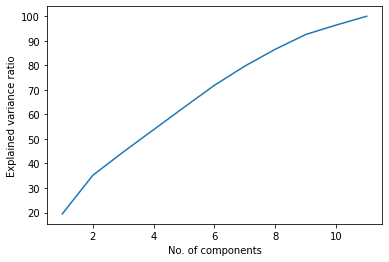

In [298]:
plt.plot(range(1,len(exp_var)+1),cum_exp_var)
plt.xlabel('No. of components')
plt.ylabel('Explained variance ratio')
plt.show()

#### Using Built-in PCA

In [299]:
from sklearn.decomposition import PCA

In [300]:
pca = PCA()
components = pca.fit_transform(xtrains)

In [301]:
components = pd.DataFrame(components,columns=['PC'+str(i) for i in range(1,xtrains.shape[1]+1)])

In [302]:
components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.602124,-0.284012,0.306200,0.544690,0.815581,-0.164872,-0.030579,-0.562245,-0.596293,-0.205998,0.262128
1,-0.673013,0.520323,-0.867345,0.328833,-2.195429,0.243081,-0.124557,0.959005,0.546878,0.649840,-1.138952
2,-0.681065,1.219556,-0.390536,-0.366255,0.625013,-0.490394,-0.390926,0.677496,0.452323,-0.211221,-0.447723
3,0.538612,2.315564,-0.525947,-0.057640,-0.777030,1.665592,0.894599,0.862115,-0.146637,-0.886436,-0.060919
4,-1.417065,0.704304,-0.439928,-1.172012,-0.440371,-1.254980,0.285650,0.185782,0.121323,0.226355,-1.126476
...,...,...,...,...,...,...,...,...,...,...,...
3214,1.018815,-1.521049,-1.748978,-1.422349,0.694215,0.078163,-0.489211,-0.732336,0.132370,0.212096,0.377119
3215,1.248539,3.357446,0.235176,0.017151,0.950293,0.272551,0.504839,-1.236625,-0.693069,2.199192,0.076870
3216,-0.822663,-1.534067,-0.048512,-1.698054,-0.754814,0.020482,0.377792,-0.236465,-0.245328,0.131764,-0.079222
3217,-1.023452,1.982946,0.249113,-0.404899,-0.759686,0.303027,-0.372657,0.679689,-1.017236,1.114977,-0.280267


In [303]:
pca.explained_variance_ratio_*100

array([19.44052908, 15.70130626,  9.49557851,  9.1391079 ,  9.10097415,
        9.00565301,  7.82436517,  6.85396373,  6.01632924,  3.83291247,
        3.58928048])

In [304]:
np.cumsum(pca1.explained_variance_ratio_*100)

array([ 19.04281309,  34.78551145,  44.19522679,  53.40616104,
        62.52285303,  71.48024333,  79.40726255,  86.31004032,
        92.50946602,  96.3232041 , 100.        ])

#### Select optimal no of components

In [305]:
pca = PCA(n_components=9)
xtrain_pc = pca.fit_transform(xtrains)
xtest_pc = pca.transform(xtests)

In [306]:
logr = LogisticRegression(random_state=1)
logr.fit(xtrain_pc,ytrain)

LogisticRegression(random_state=1)

In [307]:
print(classification_report(ytest,logr.predict(xtest_pc)))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       882
           1       0.71      0.55      0.62       498

    accuracy                           0.76      1380
   macro avg       0.74      0.71      0.72      1380
weighted avg       0.75      0.76      0.75      1380

